# Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import japanize_matplotlib

# Loading Data 

In [2]:
train_images = np.load("../data/raw/k49-train-imgs.npz")["arr_0"]
train_labels = np.load("../data/raw/k49-train-labels.npz")["arr_0"]
df_classmap = pd.read_csv("../data/raw/k49_classmap.csv")

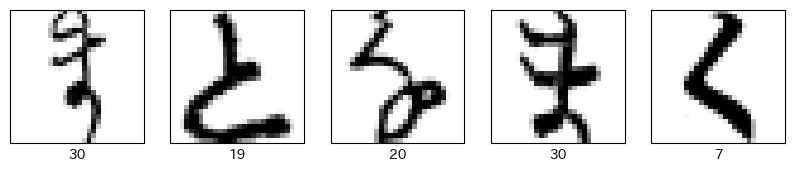

In [3]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [4]:
df_classmap.head()

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お


# Number of Labels

In [5]:
unique_labels, counts = np.unique(train_labels, return_counts=True)

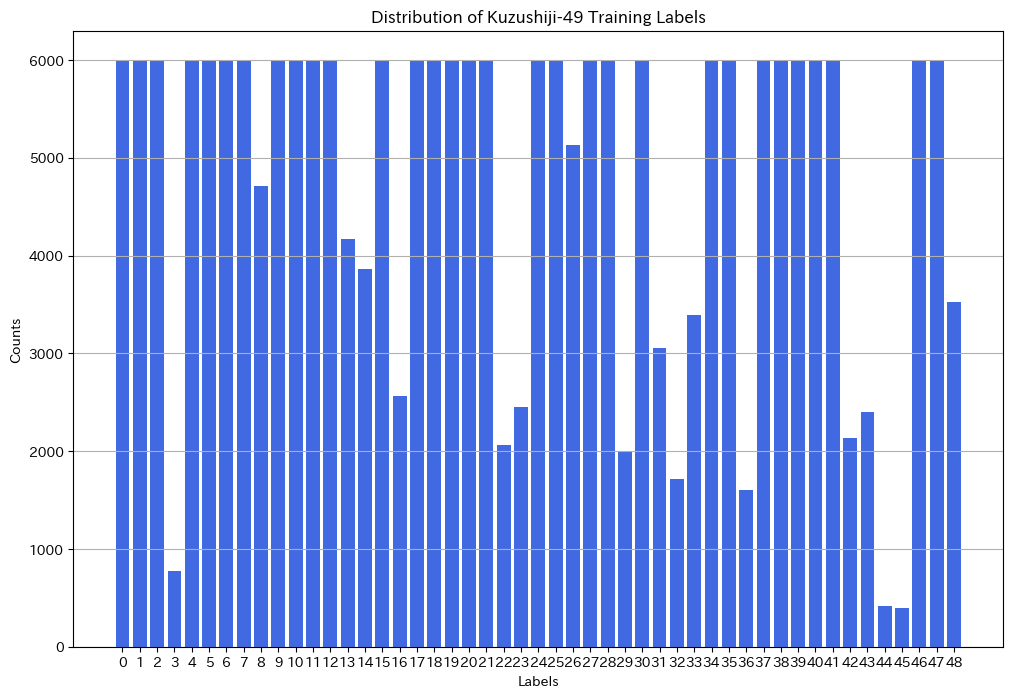

In [6]:
plt.figure(figsize=(12, 8))
plt.bar(unique_labels, counts, color='royalblue')
plt.title('Distribution of Kuzushiji-49 Training Labels')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(unique_labels)
plt.grid(axis='y')
plt.show()

# PCA

In [7]:
train_images.shape

(232365, 28, 28)

In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

In [9]:
n_samples = len(train_images)
data = train_images.reshape((n_samples, -1)) / 255.

In [10]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

In [11]:
reduced_data = reduced_data[:1000]

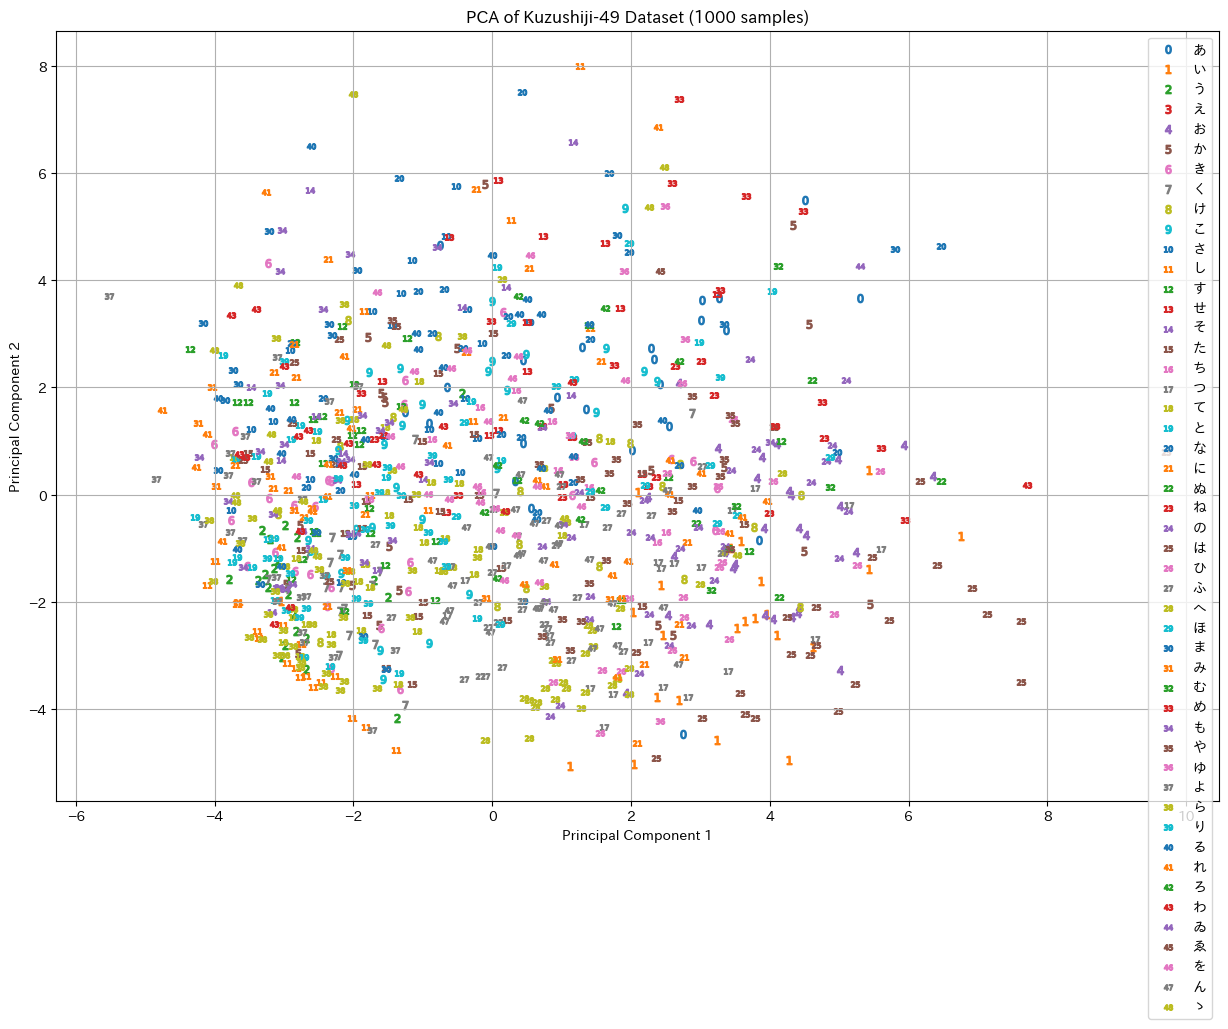

In [12]:
plt.figure(figsize=(15, 10))
for i in range(49):
    emb = reduced_data[train_labels[:1000]==i]
    marker = f"${i}$"
    plt.scatter(emb[:, 0], emb[:, 1], marker=marker, label=df_classmap[df_classmap["index"]==i].char.item())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Kuzushiji-49 Dataset (1000 samples)')
plt.grid(True)
plt.show()